In [ ]:
from re import X

import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [12]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [19]:
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

print("Shape train", X_train.shape)
print("Shape test", X_test.shape)

Shape train (60000, 784)
Shape test (10000, 784)


In [23]:
model = models.Sequential([
                           layers.Input(shape=(784,)),
                           layers.Dense(128, activation="relu"),
                           layers.Dropout(0.2),
                           layers.Dense(64, activation="relu"),
                           layers.Dropout(0.2),
                           layers.Dense(10, activation="softmax")

                           ])

In [24]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cbs = [
    callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    callbacks.ModelCheckpoint("mnist_best.keras", monitor="val_accuracy", save_best_only=True)

]

In [27]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=50,
    callbacks=cbs,
    verbose=1
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7641 - loss: 0.7738 - val_accuracy: 0.9575 - val_loss: 0.1464
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9329 - loss: 0.2280 - val_accuracy: 0.9683 - val_loss: 0.1066
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9501 - loss: 0.1666 - val_accuracy: 0.9713 - val_loss: 0.0912
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9590 - loss: 0.1337 - val_accuracy: 0.9742 - val_loss: 0.0856
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9657 - loss: 0.1118 - val_accuracy: 0.9752 - val_loss: 0.0806
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9713 - loss: 0.0971 - val_accuracy: 0.9783 - val_loss: 0.0749
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9742 - loss: 0.0852 - val_accuracy: 0.9787 - val_loss: 0.0731
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9760 - loss: 0.0784 - val_accuracy: 0

In [28]:
y_pred = model.predict(X_test).argmax(axis=1)
print("\n Reporte de clasificación: \n", classification_report(y_test, y_pred))
print("\n Matriz de confusión \n", confusion_matrix(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

 Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


 Matriz de confusión 
 [[ 971    1    1    0    0    1    3    2    1    0]
 [   0 1118    4    0    0    1    4    0    8    0]
 [   1    1 1012    1    4    0    3    

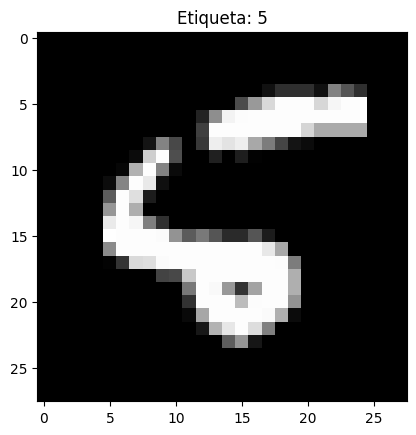

In [31]:
import matplotlib.pyplot as plt

idx = 8
sample_image = X_test[idx].reshape((28, 28))
sample_label = y_test[idx]

plt.imshow(sample_image, cmap="gray")
plt.title(f"Etiqueta: {sample_label}")
plt.show()

In [32]:
sample_input = X_test[idx].reshape(1,-1)

pred_proba = model.predict(sample_input)
pred_class = pred_proba.argmax(axis=1),[0]

print(f"Etiqueta real: {sample_label}")
print(f"Probabilidad por clase {pred_proba}")
print(f"Predicción del modelo {pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Etiqueta real: 5
Probabilidad por clase [[3.0968369e-08 3.1228378e-06 2.5591985e-06 2.6905475e-08 7.9354895e-06
  9.5950919e-01 3.9528493e-02 1.6032268e-07 8.9332042e-04 5.5164695e-05]]
Predicción del modelo (array([5]), [0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Etiqueta real: 1, Predicción del modelo: 6


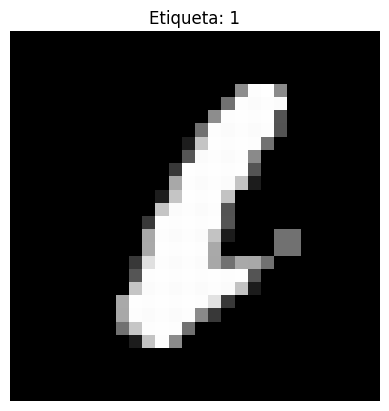

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Etiqueta real: 4, Predicción del modelo: 4


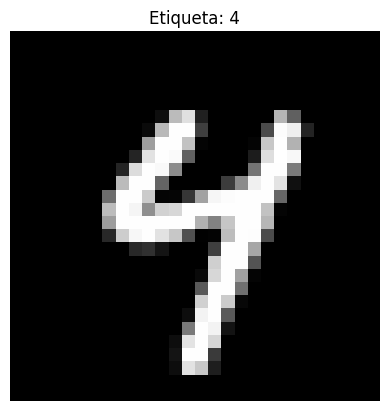

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Etiqueta real: 4, Predicción del modelo: 4


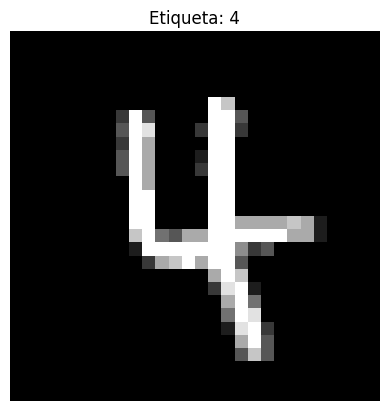

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Etiqueta real: 8, Predicción del modelo: 8


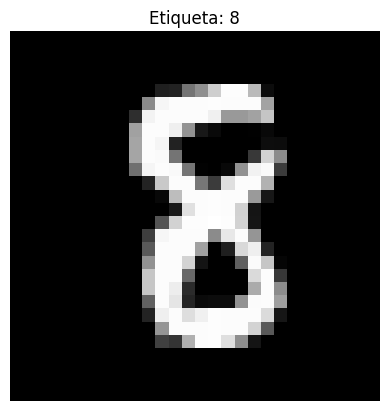

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Etiqueta real: 2, Predicción del modelo: 2


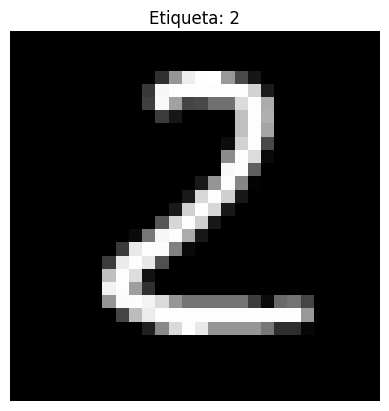

In [35]:
import random
random_indices = random.sample(range(len(X_test)), 5)

for idx in random_indices:
    sample_imagen = X_test[idx].reshape((28,28))
    sample_label = y_test[idx]
    sample_input = X_test[idx].reshape(1,-1)

    pred_proba = model.predict(sample_input)
    pred_class = pred_proba.argmax(axis=1)[0]

    print(f"Etiqueta real: {sample_label}, Predicción del modelo: {pred_class}")

    plt.imshow(sample_imagen, cmap="gray")
    plt.title(f"Etiqueta: {sample_label}")
    plt.axis("off")
    plt.show()